In [ ]:
#Andres del Castillo November 28, 2024

In [ ]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split
from google.colab import drive
import os


# Set the source variable to the 'Gene' folder in your Google Drive
source = '.'
os.chdir(source)

ENDPT_mat = np.load('ENDPTMIG.npy', allow_pickle=True)
CONT_mat = np.load('CONTMIG.npy', allow_pickle=True)
data = np.vstack((ENDPT_mat, CONT_mat))
data, data.shape

Mounted at /content/drive


(array([['C', 5e-05, 0.000347732, ..., 0.0116852, 0.00677459, 0.000740372],
        ['A', 5e-07, 0.0143056, ..., 0.0136331, 0.00558698, 0.000679398],
        ['C', 0.00025, 0.00173744, ..., 0.0209174, 0.00881744,
         0.000849515],
        ...,
        ['A', 5.694779749977754e-05, 0.0306971, ..., 0.00864418,
         0.00664397, 0.000735075],
        ['C', 0.0001463401879332, 0.00819677, ..., 0.0179048, 0.00523916,
         0.000644601],
        ['A', 0.0001601924884385, 0.00126094, ..., 0.0111684, 0.00294168,
         0.000487045]], dtype=object),
 (792000, 31))

In [ ]:
from sklearn.preprocessing import StandardScaler
import numpy as np
# Step 1: Extract the relevant columns
class_column = data[:, 0].reshape(-1,1)  # First column: 'Class'
migration_rate_column = data[:, 1].astype(float).reshape(-1,1)  # Second column: 'migration rate'
d_statistic_column = data[:, 2].astype(float)  # Third column: 'D statistic'

reg_features = data[:, 3:].astype(float)  # Columns 4 and onwards: features
class_features = np.hstack([migration_rate_column, reg_features])

# Normalize the input data so that each feature has mean=0 and variance=1
scaler_x_mig, scaler_x_class = StandardScaler(), StandardScaler()
std_reg_features = scaler_x_mig.fit_transform(reg_features)
std_class_features = scaler_x_class.fit_transform(class_features)
print(f'INPUT FOR REGRESSION: {std_reg_features, std_reg_features.shape}')
print(f'INPUT FOR CLASSIFICATION: {std_class_features, std_class_features.shape}')

INPUT FOR REGRESSION: (array([[ 0.20120039,  0.46912331,  0.40754672, ..., -0.45600594,
        -0.1482276 , -0.04396269],
       [-0.83104508, -0.34006398, -0.30226847, ..., -0.12636703,
        -0.42601218, -0.36766803],
       [-0.90102782, -0.61434802, -0.42733157, ...,  1.10633933,
         0.3295995 ,  0.53546742],
       ...,
       [ 1.60085525,  0.95726986,  0.97139973, ..., -0.97063119,
        -0.1787799 , -0.07208398],
       [-1.3034286 , -0.92748621, -0.78213376, ...,  0.59652353,
        -0.50736804, -0.5524021 ],
       [-1.25094154, -1.06413432, -0.94779043, ..., -0.54346289,
        -1.04475365, -1.38885236]]), (792000, 28))
INPUT FOR CLASSIFICATION: (array([[-0.45769202,  0.20120039,  0.46912331, ..., -0.45600594,
        -0.1482276 , -0.04396269],
       [-0.73016701, -0.83104508, -0.34006398, ..., -0.12636703,
        -0.42601218, -0.36766803],
       [ 0.64321704, -0.90102782, -0.61434802, ...,  1.10633933,
         0.3295995 ,  0.53546742],
       ...,
       [-0

In [ ]:
# Take the natural log of the migration_rate_column
mig_rate_log = np.log(migration_rate_column + 1e-10)

# Initialize the OneHotEncoder with the correct parameter
encoder = OneHotEncoder(sparse_output=False)
# Fit and transform the data
one_hot_encoded = encoder.fit_transform(class_column)
print(f'TARGET FOR REGRESSION:\n {mig_rate_log, mig_rate_log.shape}')
print(f'TARGET FOR CLASSIFICATION:\n {one_hot_encoded, one_hot_encoded.shape}')

TARGET FOR REGRESSION:
 (array([[ -9.90348555],
       [-14.50845776],
       [ -8.29404924],
       ...,
       [ -9.77337379],
       [ -8.82957591],
       [ -8.73913379]]), (792000, 1))
TARGET FOR CLASSIFICATION:
 (array([[0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [0., 0., 1., 0.],
       ...,
       [1., 0., 0., 0.],
       [0., 0., 1., 0.],
       [1., 0., 0., 0.]]), (792000, 4))


Epoch 1/210
4347/4347 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 10.3694
Epoch 1 - Mean Relative Error on Validation Set: 229.8702%
4347/4347 ━━━━━━━━━━━━━━━━━━━━ 14s 3ms/step - loss: 10.3685 - val_loss: 3.7441 - learning_rate: 0.0010
Epoch 2/210
4342/4347 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.3206
Epoch 2 - Mean Relative Error on Validation Set: 146.7040%
4347/4347 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - loss: 3.3203 - val_loss: 2.6937 - learning_rate: 0.0010
Epoch 3/210
4331/4347 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.3459
Epoch 3 - Mean Relative Error on Validation Set: 93.6873%
4347/4347 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - loss: 2.3454 - val_loss: 1.3827 - learning_rate: 0.0010
Epoch 4/210
4341/4347 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.9036
Epoch 4 - Mean Relative Error on Validation Set: 49.9009%
4347/4347 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - loss: 1.9035 - val_loss: 1.4921 - learning_rate: 0.0010
Epoch 5/210
4335/4347 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.6118
Epoch 

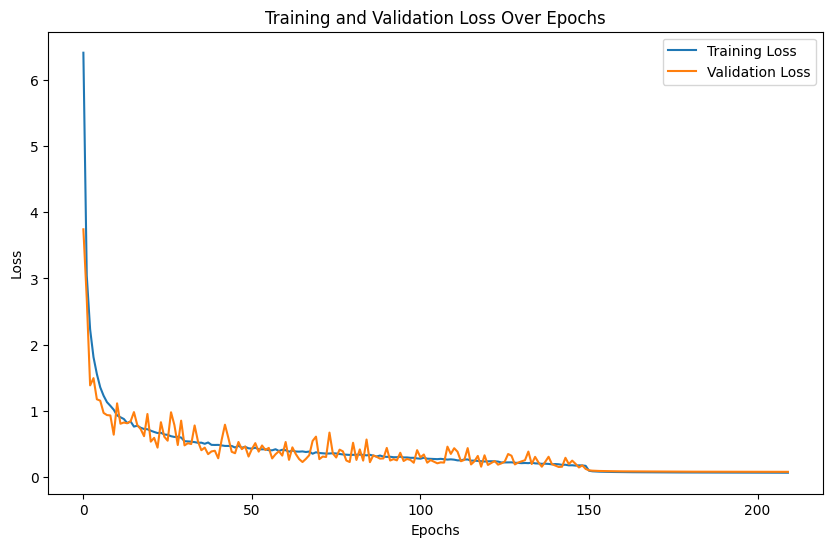

Mean Relative Errors Per Epoch: [229.87020015716553, 146.70403003692627, 93.68734359741211, 49.90091025829315, 68.7701940536499, 55.6237518787384, 63.28626275062561, 61.63654923439026, 47.2975492477417, 46.43530547618866, 91.26235246658325, 43.33344101905823, 52.568233013153076, 36.865025758743286, 48.917362093925476, 60.406142473220825, 67.08308458328247, 72.95423746109009, 63.89155387878418, 105.4268479347229, 29.14789915084839, 39.350053668022156, 32.708120346069336, 41.07105731964111, 34.910380840301514, 44.90157067775726, 53.1125545501709, 110.22371053695679, 27.905455231666565, 41.00825786590576, 30.581653118133545, 34.58783030509949, 42.59113967418671, 37.73712515830994, 40.62400460243225, 31.767666339874268, 26.430100202560425, 27.864092588424683, 26.241767406463623, 28.184089064598083, 23.566056787967682, 45.48267722129822, 30.93687891960144, 54.86687421798706, 27.159398794174194, 26.077046990394592, 46.82640731334686, 30.2047997713089, 25.748518109321594, 19.086170196533203, 

In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import AdamW
from tensorflow.keras.regularizers import l1_l2
from sklearn.model_selection import train_test_split

# Normalize the input data
X = std_reg_features.copy()
Y = mig_rate_log.copy()

# Apply weights to specific features
weights = np.ones(X.shape[1])
weights[0] = 5
weights[-9:] = 5
X *= weights

# Split the data into training and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, shuffle=True, random_state=42)

# Reshape the input data
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

# Define custom loss function
beta = 0.1
def custom_loss(y_true, y_pred):
    mse = tf.reduce_mean(tf.square(y_true - y_pred))
    non_zero_penalty = tf.reduce_mean(tf.where(tf.abs(y_pred) > 1e-10, 1 / tf.abs(y_pred), 0.0))
    combined_loss = mse + beta * non_zero_penalty
    return combined_loss

# Build the model
model = Sequential([
    Input(shape=(X_train.shape[1],)),
    Dense(400, activation='relu', kernel_regularizer=l1_l2(l1=1e-7, l2=1e-7)),
    Dense(400, activation='relu', kernel_regularizer=l1_l2(l1=1e-7, l2=1e-7)),
    Dense(400, activation='relu', kernel_regularizer=l1_l2(l1=1e-7, l2=1e-7)),
    Dense(1, activation='linear')
])

# Compile the model
model.compile(
    optimizer=AdamW(learning_rate=1e-3),
    loss=custom_loss
)

# Custom callback to compute the L2 relative error on the validation set
class RelativeErrorCallback(tf.keras.callbacks.Callback):
    def __init__(self, validation_data):
        super().__init__()
        self.validation_data = validation_data
        self.relative_errors = []  # Store mean relative errors per epoch

    def on_epoch_end(self, epoch, logs=None):
      X_val, Y_val = self.validation_data
      predictions = self.model.predict(X_val, verbose=0)

      # Convert predictions and true values to TensorFlow tensors
      predictions = tf.convert_to_tensor(predictions, dtype=tf.float32)
      Y_val = tf.convert_to_tensor(Y_val, dtype=tf.float32)

      # Apply exponential transformation and adjust small values
      predictions = tf.exp(predictions) - 1e-10
      Y_val = tf.exp(Y_val) - 1e-10

      # Set values below the threshold to zero
      Y_val = tf.where(Y_val < 2.5e-10, 0.0, Y_val)
      predictions = tf.where(predictions < 2.5e-10, 0.0, predictions)

      # Mask for non-zero true values
      nonzero_mask = tf.not_equal(Y_val, 0)

      # Calculate relative difference only for non-zero true values
      rel_diff_nonzero = tf.abs(predictions - Y_val) / tf.abs(Y_val)
      rel_diff_nonzero = tf.boolean_mask(rel_diff_nonzero, nonzero_mask)

      # Calculate mean relative difference over non-zero true values
      mean_relative_error = tf.reduce_mean(rel_diff_nonzero).numpy() * 100  # Convert to percentage
      self.relative_errors.append(mean_relative_error)

      print(f"\nEpoch {epoch + 1} - Mean Relative Error on Validation Set: {mean_relative_error:.4f}%")

# Learning rate scheduler function
def lr_scheduler(epoch, lr):
    if epoch < 30:
        return 1e-3
    elif epoch<150:
        decay_val = -(5.123e-6)*(epoch) + 0.0010768
        return decay_val
    else:
        return 1e-6

# Initialize the callback for relative error calculation and learning rate scheduling
relative_error_callback = RelativeErrorCallback(validation_data=(X_test, Y_test))
lr_callback = tf.keras.callbacks.LearningRateScheduler(lr_scheduler)

# Train the model
history = model.fit(
    X_train, Y_train,
    epochs=210,
    batch_size=164,
    validation_data=(X_test, Y_test),
    callbacks=[relative_error_callback, lr_callback]
)

# Save the final model
model.save('/content/drive/My Drive/Gene/migration_model_final.h5')

# Plot the training and validation loss curves
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss Over Epochs')
plt.legend()
plt.show()

# Output the list of mean relative errors per epoch
print("Mean Relative Errors Per Epoch:", relative_error_callback.relative_errors)


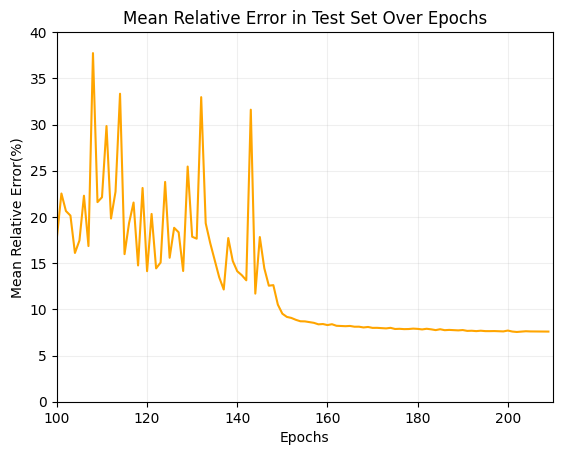

In [ ]:
plt.plot(relative_error_callback.relative_errors, c='orange')
plt.xlabel('Epochs')
plt.xlim([100,210])
plt.ylim([0,40])
plt.ylabel('Mean Relative Error(%)')
plt.title('Mean Relative Error in Test Set Over Epochs')
plt.grid(alpha=0.2)
plt.show()

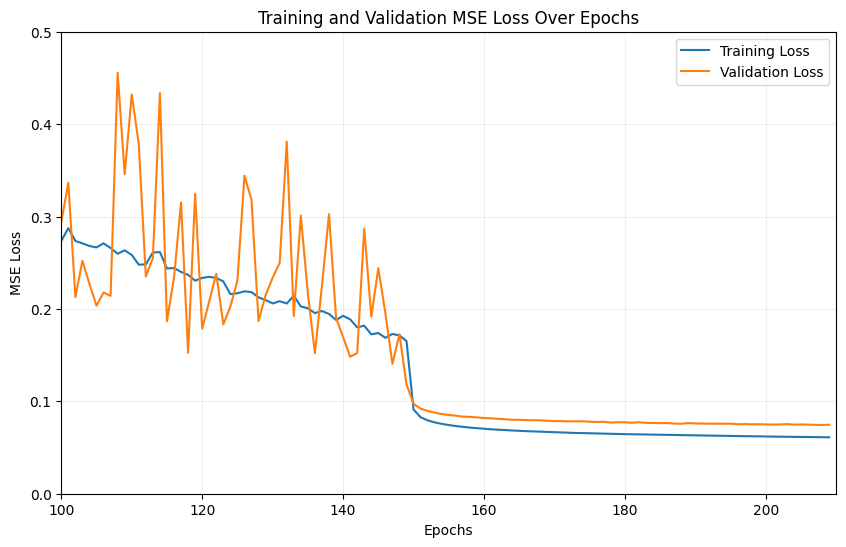

In [ ]:
# Plot the training and validation loss curves
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.xlim([100,210])
plt.ylim([0,0.5])
plt.ylabel('MSE Loss')
plt.title('Training and Validation MSE Loss Over Epochs')
plt.grid(alpha=0.2)
plt.legend()
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.regularizers import l1_l2
from tensorflow.keras.optimizers import AdamW
from tensorflow.keras.callbacks import LearningRateScheduler
# Assign your data
X = std_class_features  # Your input features matrix
Y = one_hot_encoded  # Your one-hot encoded labels matrix

# Convert one-hot encoded targets to label indices
Y_labels = np.argmax(Y, axis=1)

# Print some random elements in Y and their corresponding integer labels
random_indices = np.random.choice(len(Y), 5, replace=False)
print("Random elements from Y (one-hot):")
print(Y[random_indices])
print("Corresponding integer labels:")
print(Y_labels[random_indices])

# Increase variance to 50
#X *= np.sqrt(50)

# Apply weights to specific features
weights = np.ones(X.shape[1])
weights[:2] = 5       # Increase weight of the first two component
weights[-9:] = 5     # Increase weight of the last nine components
X *= weights.reshape(1, -1)  # Ensure correct broadcasting

# Split data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, shuffle=True, random_state=42)

# Reshape the input data to be compatible with the model input
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

# Determine the number of classes from Y
num_classes = Y.shape[1]  # Number of columns in Y

# Build the DNN model
model = Sequential([
    Dense(300, activation='relu', kernel_regularizer=l1_l2(l1=1e-7, l2=1e-7), input_shape=(X_train.shape[1],)),
    Dense(300, activation='relu', kernel_regularizer=l1_l2(l1=1e-7, l2=1e-7)),
    Dense(300, activation='relu', kernel_regularizer=l1_l2(l1=1e-7, l2=1e-7)),
    Dense(num_classes, activation='softmax')  # Adjust output shape to num_classes
])

# Function to adjust the learning rate
def lr_schedule(epoch, lr):
    if epoch < 15:
        return 9e-4  # Keep learning rate constant for this example
    elif epoch < 85:
        return -(1.274e-5)*(epoch) + 0.001091

# Compile the model
model.compile(optimizer=AdamW(learning_rate=1e-3),  # Use AdamW if desired
              loss='categorical_crossentropy',      # Use categorical_crossentropy for one-hot encoded targets
              metrics=['accuracy'])

# Callback to save the model every 10 epochs and plot accuracies above 95%
class CustomCallback(tf.keras.callbacks.Callback):
    def __init__(self, X_test, Y_test):
        super(CustomCallback, self).__init__()
        self.history = {'accuracy': [], 'val_accuracy': []}
        self.X_test = X_test
        self.Y_test = Y_test

    def on_epoch_end(self, epoch, logs=None):
        # Store accuracy metrics
        self.history['accuracy'].append(logs.get('accuracy'))
        self.history['val_accuracy'].append(logs.get('val_accuracy'))

        # Select 5 random test samples and print predictions
        random_test_indices = np.random.choice(len(self.X_test), 5, replace=False)
        Y_pred_probs = self.model.predict(self.X_test[random_test_indices])
        Y_pred_classes = np.argmax(Y_pred_probs, axis=1)
        Y_true_classes = np.argmax(self.Y_test[random_test_indices], axis=1)

# Create the learning rate scheduler callback
lr_scheduler = LearningRateScheduler(lr_schedule)

# Train the model with the custom callback and learning rate scheduler
history = model.fit(X_train, Y_train,
                    epochs=85,
                    batch_size=164,
                    validation_data=(X_test, Y_test),
                    callbacks=[CustomCallback(X_test, Y_test), lr_scheduler])

# Save the final model
model.save('/content/drive/My Drive/Gene/migration/class_model_final.h5')

Random elements from Y (one-hot):
[[0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]]
Corresponding integer labels:
[2 2 0 2 0]


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/85
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step
4347/4347 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - accuracy: 0.8293 - loss: 0.5686 - val_accuracy: 0.9316 - val_loss: 0.1721 - learning_rate: 9.0000e-04
Epoch 2/85
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
4347/4347 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.9339 - loss: 0.1670 - val_accuracy: 0.9595 - val_loss: 0.1057 - learning_rate: 9.0000e-04
Epoch 3/85
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
4347/4347 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.9550 - loss: 0.1152 - val_accuracy: 0.9554 - val_loss: 0.1139 - learning_rate: 9.0000e-04
Epoch 4/85
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
4347/4347 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.9630 - loss: 0.0955 - val_accuracy: 0.9670 - val_loss: 0.0848 - learning_rate: 9.0000e-04
Epoch 5/85
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
4347/4347 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.9689 - loss: 0.0807 - val_accuracy: 0.9766 - val_loss: 0.0614 - learning_rate: 9.0000e-04
Epoch 6/85
1/1 ━━━

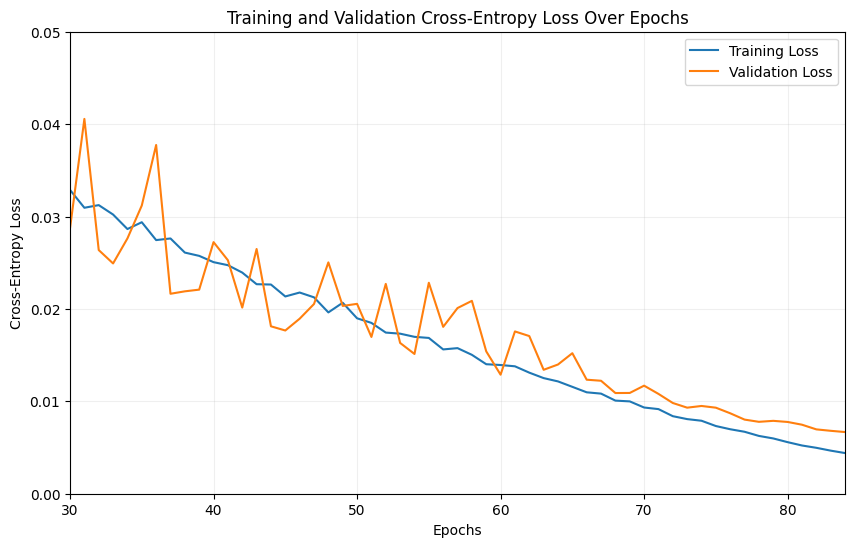

In [ ]:
# Plot the training and validation loss curves
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.xlim([30,84])
plt.ylim([0,0.05])
#plt.xticks(range(30,85))
plt.ylabel('Cross-Entropy Loss')
plt.title('Training and Validation Cross-Entropy Loss Over Epochs')
plt.grid(alpha=0.2)
plt.legend()
plt.show()

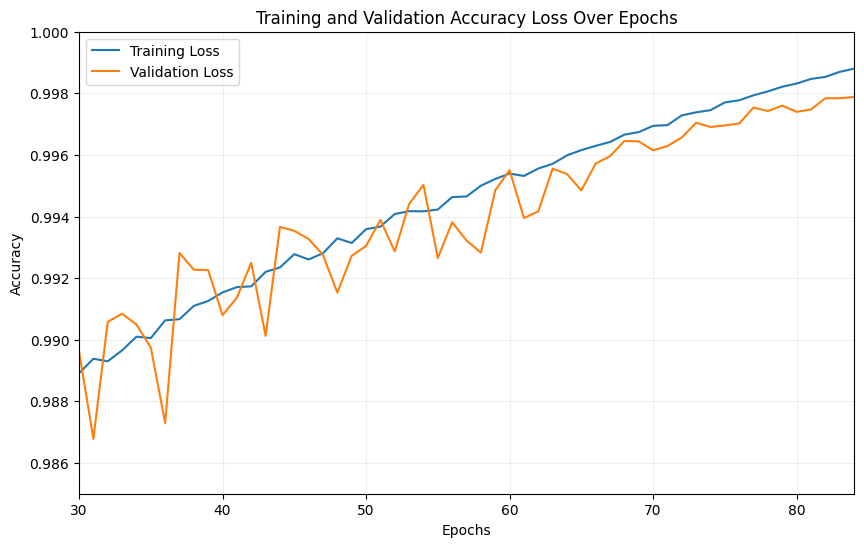

In [ ]:
# Plot the training and validation loss curves
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Training Loss')
plt.plot(history.history['val_accuracy'], label='Validation Loss')
plt.xlabel('Epochs')
#plt.xticks(range(5,20))
plt.xlim([30,84])
plt.ylim([0.985,1])
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy Loss Over Epochs')
plt.grid(alpha=0.2)
plt.legend()
plt.show()

In [ ]:
# Select five random row indices without replacement
random_indices = np.random.choice(std_reg_features.shape[0], size=5, replace=False)

# Create a new matrix with the selected rows
ref_matrix = std_reg_features[random_indices, :]

print("Selected Rows:\n", ref_matrix)

# Select five random row indices without replacement
random_indices = np.random.choice(std_class_features.shape[0], size=5, replace=False)

# Create a new matrix with the selected rows
cl_matrix = std_class_features[random_indices, :]

print("Selected Rows:\n", cl_matrix)

# Apply weights to specific features
weights = np.ones(cl_matrix.shape[1])
weights[:2] = 5       # Increase weight of the first two component
weights[-9:] = 5     # Increase weight of the last nine components
cl_matrix *= weights.reshape(1, -1)  # Ensure correct broadcasting

# Apply weights to specific features
weights = np.ones(ref_matrix.shape[1])
weights[0] = 5       # Increase weight of the first two component
weights[-9:] = 5     # Increase weight of the last nine components
ref_matrix *= weights.reshape(1, -1)  # Ensure correct broadcasting

Selected Rows:
 [[-0.98850625 -0.66884262 -0.62268056 -0.53251215 -0.70469515 -0.60916671
  -0.52041524 -0.6619108  -0.45652207 -0.38386286 -0.77956751 -0.87083966
  -0.73979326 -0.7649     -0.83624165 -0.70202854 -0.74914002 -0.79609054
  -0.64665502 -0.60042564 -0.70227331 -0.57681299  1.12088408  0.22775836
   0.28377241  0.06831267 -0.44644587 -0.46112074]
 [-1.51337683 -1.66324572 -1.61601829 -1.4872053  -1.59162011 -1.49444295
  -1.3649995  -1.61836094 -1.61668166 -1.48732151 -1.81721166 -1.68076781
  -1.93779955 -1.72477593 -1.60866794 -1.80599705 -1.78716862 -1.76603691
  -1.96173465 -1.31980224 -1.65424501 -1.79330443  1.26804539 -1.53631703
  -1.75391708  0.78216648 -0.84612625 -1.06057605]
 [ 0.20120039  0.48690403  0.40381259  0.49340741  0.34702346  0.45022413
   0.53178707  0.48141875  0.44515231  0.52740978  0.22538846  0.20205463
   0.35552043  0.0984613   0.09771165  0.2667863   0.64473245  0.5460326
   0.62314438  1.25174234  0.97392967  0.96712927  0.12673856  1.0153

In [ ]:
from tensorflow.keras.models import load_model
from sklearn.metrics import mean_squared_error, mean_absolute_error, accuracy_score, classification_report
import numpy as np

# Load the regression model
regression_model = load_model('/content/drive/My Drive/Gene/migration_model_final.h5')

# Load the classification model
classification_model = load_model('/content/drive/My Drive/Gene/migration/class_model_final.h5')

import numpy as np
from sklearn.metrics import accuracy_score, classification_report
import tensorflow as tf

# Select indices for the true values corresponding to selected samples
mig_rate_true = mig_rate_log[random_indices]
one_hot_true = one_hot_encoded[random_indices]

# Regression Evaluation with Custom Loss
y_pred_reg = regression_model.predict(ref_matrix)

# Compute custom loss for regression model
def evaluate_custom_loss(y_true, y_pred):
    mse = tf.reduce_mean(tf.square(y_true - y_pred)).numpy()
    non_zero_penalty = tf.reduce_mean(tf.where(tf.abs(y_pred) > 1e-10, 1 / tf.abs(y_pred), 0.0)).numpy()
    combined_loss = mse + beta * non_zero_penalty
    return combined_loss

regression_loss = evaluate_custom_loss(mig_rate_true, y_pred_reg)
print(f"Regression Model Custom Loss Evaluation on Selected Rows:\nCustom Loss: {regression_loss}")

# Classification Evaluation
y_pred_class = classification_model.predict(cl_matrix)
y_pred_class_labels = np.argmax(y_pred_class, axis=1)  # Convert probabilities to class labels
true_class_labels = np.argmax(one_hot_true, axis=1)     # Convert one-hot encoded labels

accuracy = accuracy_score(true_class_labels, y_pred_class_labels)
print(f"Classification Model Evaluation on Selected Rows:\nAccuracy: {accuracy}")
print(classification_report(true_class_labels, y_pred_class_labels))



TypeError: string indices must be integers